In [71]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
# Read the climate data from the provided URL
climate_data = pd.read_csv('https://raw.githubusercontent.com/HeardLibrary/digital-scholarship/master/data/codegraf/mesa2880172.csv')

# Extract the year and month from the DATE column
climate_data['YEAR'] = climate_data['DATE'].str.slice(0, 4)
climate_data['MONTH'] = climate_data['DATE'].str.slice(5, 7)

# Create a list of years from 1896 to 2017
year_list = []
for i in range(1896, 2018):
        year_list.append(i)

# Create a list of months from 01 to 12
month_list = []
for i in range(1, 13):
        if i < 10:
                month_list.append('0' + str(i))
        else:
                month_list.append(str(i))

In [73]:
# Create an empty list to store yearly precipitation data
yearly_precipitation = []

# Iterate over each year in the year_list
for year in year_list:
    # Filter the climate_data dataframe for rows with matching year, and calculate the mean precipitation for the year
    rows = climate_data[climate_data['YEAR'] == str(year)]
    mean_precip = rows['PRCP'].mean()

    # Check if the mean precipitation is not NaN (not missing)
    if not np.isnan(mean_precip):
        # Create a dictionary with year and mean precipitation, and append to the yearly_precipitation list
        year_dict = {'year': int(year), 'precipitation': mean_precip}
        yearly_precipitation.append(year_dict)

# Create a dataframe from the yearly_precipitation list
yearly_precipitation_df = pd.DataFrame(yearly_precipitation)


In [74]:
# Create an empty list to store yearly temperature data
yearly_temperature = []

# Iterate over each year in the year_list
for year in year_list:
    # Filter the climate_data dataframe for rows with matching year, and calculate the mean temperature for the year
    rows = climate_data[climate_data['YEAR'] == str(year)]
    mean_temp = rows['TAVG'].mean()

    # Check if the mean temperature is not NaN (not missing)
    if not np.isnan(mean_temp):
        # Create a dictionary with year and mean temperature, and append to the yearly_temperature list
        year_dict = {'year': int(year), 'temperature': mean_temp}
        yearly_temperature.append(year_dict)

# Create a dataframe from the yearly_temperature list
yearly_temperature_df = pd.DataFrame(yearly_temperature)

In [75]:
# Create an empty list to store monthly precipitation data
monthly_precipitation = []

# Iterate over each month in the month_list
for month in month_list:
    # Filter the climate_data dataframe for rows with matching month, and calculate the mean precipitation for the month
    rows = climate_data[climate_data['MONTH'] == month]
    mean_precip = rows['PRCP'].mean()

    # Check if the mean precipitation is not NaN (not missing)
    if not np.isnan(mean_precip):
        # Create a dictionary with month and mean precipitation, and append to the monthly_precipitation list
        month_dict = {'month': int(month), 'precipitation': mean_precip}
        monthly_precipitation.append(month_dict)

# Create a dataframe from the monthly_precipitation list
monthly_precipitation_df = pd.DataFrame(monthly_precipitation)

In [86]:
# Create an empty list to store monthly temperature data
monthly_temperature = []

# Iterate over each month in the month_list
for month in month_list:
    # Filter the climate_data dataframe for rows with matching month, and calculate the mean temperature,
    # lower deviation, and upper deviation for the month
    rows = climate_data[climate_data['MONTH'] == month]
    mean_temp = rows['TAVG'].mean()
    upper_deviation = rows['TMAX'].mean() - mean_temp
    lower_deviation = mean_temp - rows['TMIN'].mean()

    # Check if the mean temperature is not NaN (not missing)
    if not np.isnan(mean_temp):
        # Create a dictionary with month and mean temperature, tmax, and tmin, and append to the monthly_temperature list
        month_dict = {'month': int(month), 'temperature': mean_temp, 'upper_deviation': upper_deviation, 'lower_deviation': lower_deviation}
        monthly_temperature.append(month_dict)

# Create a dataframe from the monthly_temperature list
monthly_temperature_df = pd.DataFrame(monthly_temperature)

Text(0.5, 1.0, 'Average Precipitation in Mesa, Arizona from 1896 through 2017')

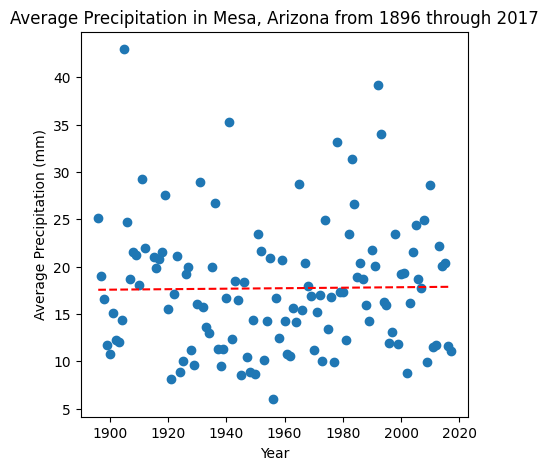

In [77]:
# Plot the average yearly precipitation in a scatter plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(yearly_precipitation_df['year'], yearly_precipitation_df['precipitation'])

# Fit a linear regression line to the data
z = np.polyfit(yearly_precipitation_df['year'], yearly_precipitation_df['precipitation'], 1)
p = np.poly1d(z)
ax.plot(yearly_precipitation_df['year'], p(yearly_precipitation_df['year']), color='red', linestyle='--')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Precipitation (mm)')
plt.title('Average Precipitation in Mesa, Arizona from 1896 through 2017')


Text(0.5, 1.0, 'Average Temperature in Mesa, Arizona from 1896 through 2017')

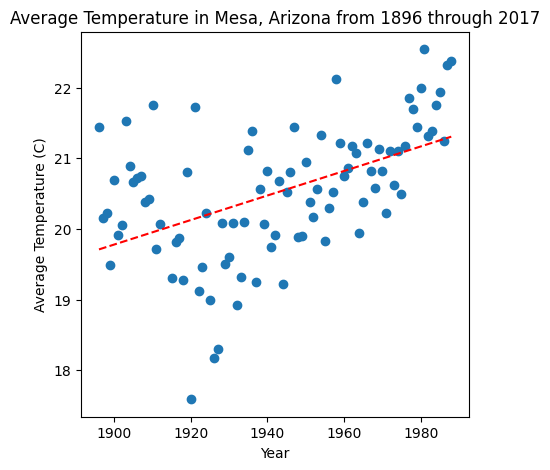

In [78]:
# Plot the average yearly temperature in a scatter plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(yearly_temperature_df['year'], yearly_temperature_df['temperature'])

# Fit a linear regression line to the data
z = np.polyfit(yearly_temperature_df['year'], yearly_temperature_df['temperature'], 1)
p = np.poly1d(z)
ax.plot(yearly_temperature_df['year'], p(yearly_temperature_df['year']), color='red', linestyle='--')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature (C)')
plt.title('Average Temperature in Mesa, Arizona from 1896 through 2017')

Text(0.5, 1.0, 'Average Precipitation by Month in Mesa, Arizona from 1896 through 2017')

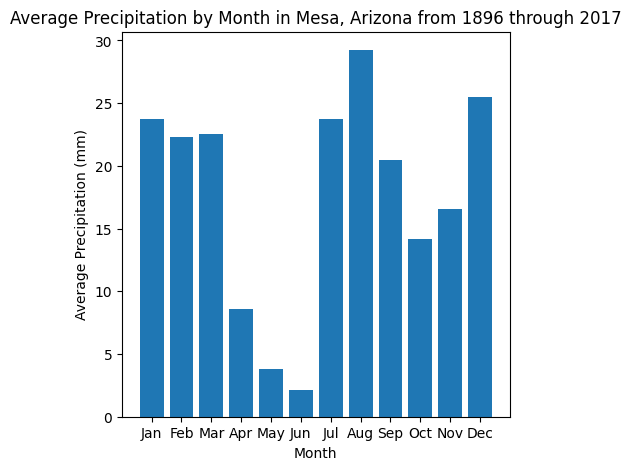

In [79]:
# Plot the average monthly precipitation in a bar chart
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(monthly_precipitation_df['month'], monthly_precipitation_df['precipitation'])

# Add labels and title
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_abbr)

ax.set_xlabel('Month')
ax.set_ylabel('Average Precipitation (mm)')

plt.title('Average Precipitation by Month in Mesa, Arizona from 1896 through 2017')

Text(0.5, 1.0, 'Average Temperature by Month in Mesa, Arizona from 1896 through 2017')

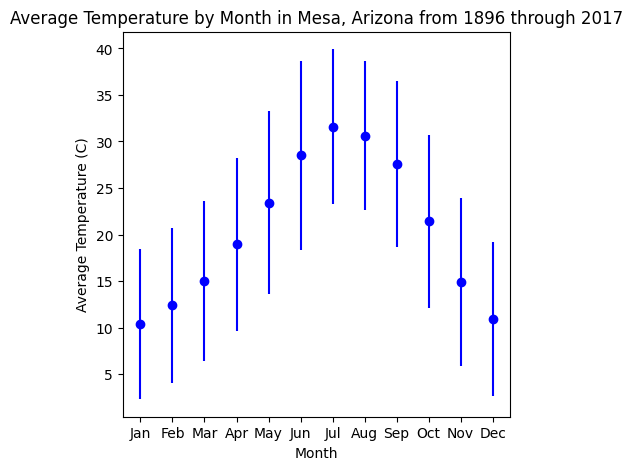

In [87]:
# Plot the average monthly temperature in an error bar chart
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

# Plot the average temperature with error bars for min and max temperature
ax.errorbar(monthly_temperature_df['month'], monthly_temperature_df['temperature'], yerr=[monthly_temperature_df['lower_deviation'], monthly_temperature_df['upper_deviation']], fmt='o', color='b')

# Add labels and title
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_abbr)

ax.set_xlabel('Month')
ax.set_ylabel('Average Temperature (C)')

plt.title('Average Temperature by Month in Mesa, Arizona from 1896 through 2017')